# ML Assessment 

## Part 1 - LightBGM Model

**What to do:**
- Build a LightGBM model to predict risk of loan applications.

**Details:**
- Name: Khor Kean Teng
- Email: khorkeanteng@gmail.com
- Date: 2025-08-04

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

# turn off warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

**What to do:**
- Load the dataset `loan`, `payment` and `clarity_underwriting`
- Merge the datasets

In [44]:
# read the load data
loan = pd.read_csv('../assessment/data/data/loan.csv')
display(loan.head(n=2))

# read the payment data
payment = pd.read_csv('../assessment/data/data/payment.csv')
display(payment.head(n=2))

# use the loanID to merge the dataset
loan_payment = pd.merge(loan, payment, on='loanId', how='left')

# print dimension of the merged dataset
print(f"Dimension of loan_payment dataset: {loan_payment.shape}")

# check if all payments are included in the loan dataset
missing_payments = payment[~payment['loanId'].isin(loan_payment['loanId'])]
print(f"Number of missing payments: {len(missing_payments)}")

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1


,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN


Dimension of loan_payment dataset: (1227094, 27)
Number of missing payments: 0


- All the payments are being matched
- They are also null values in the dataset which need to be filled

In [45]:
# clarity_underwriting_variables
clarity_underwriting_variables = pd.read_csv('../assessment/data/data/clarity_underwriting_variables.csv')
# preview the clarity_underwriting_variables dataset
display(clarity_underwriting_variables.head(n=2))

# check the dimension of clarity_underwriting_variables
print(f"Dimension of clarity_underwriting_variables dataset: {clarity_underwriting_variables.shape}")

# check missing value in clarityfraudId
missing_clarity_fraud = loan_payment[loan_payment['clarityFraudId'].isnull()]
print(f"Number of missing clarityFraudId: {len(missing_clarity_fraud)}")

# join the clarityfraudId in load_payment with the underwritingId in clarity_underwriting_variables
loan_payment = pd.merge(loan_payment, clarity_underwriting_variables, left_on='clarityFraudId', right_on='underwritingid', how='left')

# check if all clarityfraudId are included in the clarity_underwriting_variables dataset
missing_clarity = clarity_underwriting_variables[~clarity_underwriting_variables['underwritingid'].isin(loan_payment['clarityFraudId'])]
print(f"Number of missing clarity underwriting variables: {len(missing_clarity)}")

# preview the data
display(loan_payment.head(n=2))

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af


Dimension of clarity_underwriting_variables dataset: (49752, 54)
Number of missing clarityFraudId: 328843
Number of missing clarity underwriting variables: 18004


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64


- There are about 320k data without underwriting report
- There are also about 18k underwriting report that do not correspond to the loan data, they are applications that never made to the `loan` table

## EDA

**What to do:**
- Plot histogram for some variables
- Plot correlation heatmap for numerical variables
- Plot bar chart for categorical variables
- Create the `isRisky` target variable
    - Check the relationship of `isRisky` with the some selected variables

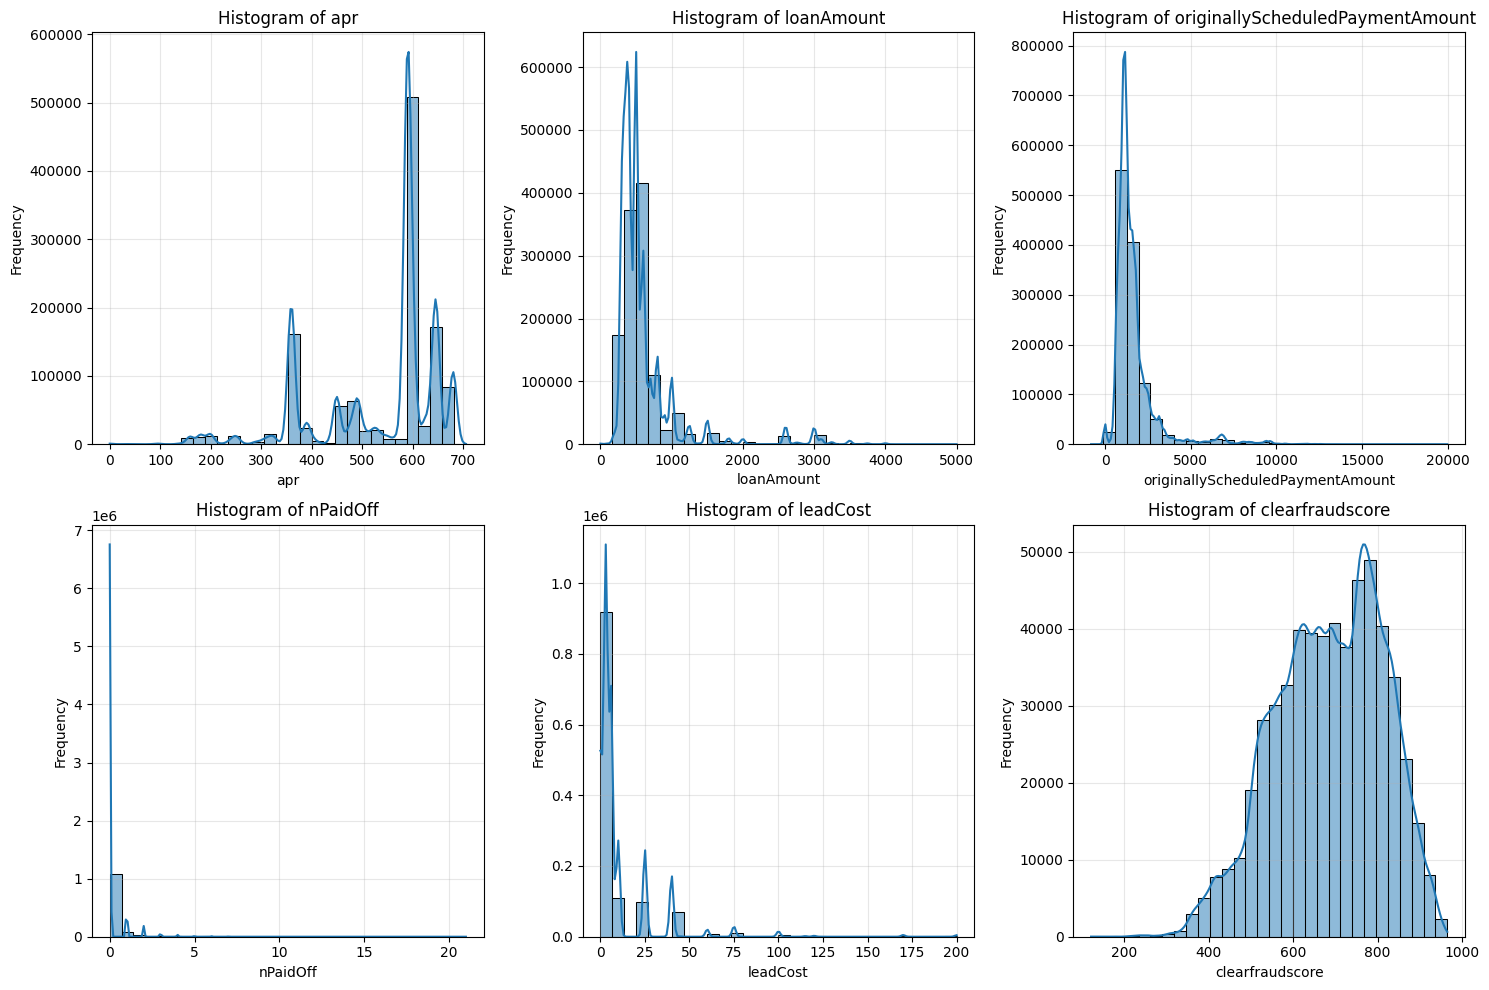

In [46]:
# plot histogram for apr, loanAmount, originallyScheduledPaymentAmount, nPaidOff, leadCost, and clearfraudscore in grid
def plot_histograms_grid(data, columns, figsize=(15, 10), bins=30):
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, column in enumerate(columns):
        sns.histplot(data=data, x=column, bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots if any
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all numerical columns in grid
columns_to_plot = ['apr', 'loanAmount', 'originallyScheduledPaymentAmount', 'nPaidOff', 'leadCost', 'clearfraudscore']
plot_histograms_grid(loan_payment, columns_to_plot)

- Loan amount seems rightly skewed
- Transformation is needed for the variables as well
- Most of the `nPaidOff` are 0 which means majority of borrowers in the dataset have never previously paid off a loan from the lending institution. 
- Most of the customers have low lead cost meaning they do not cost much to acquire

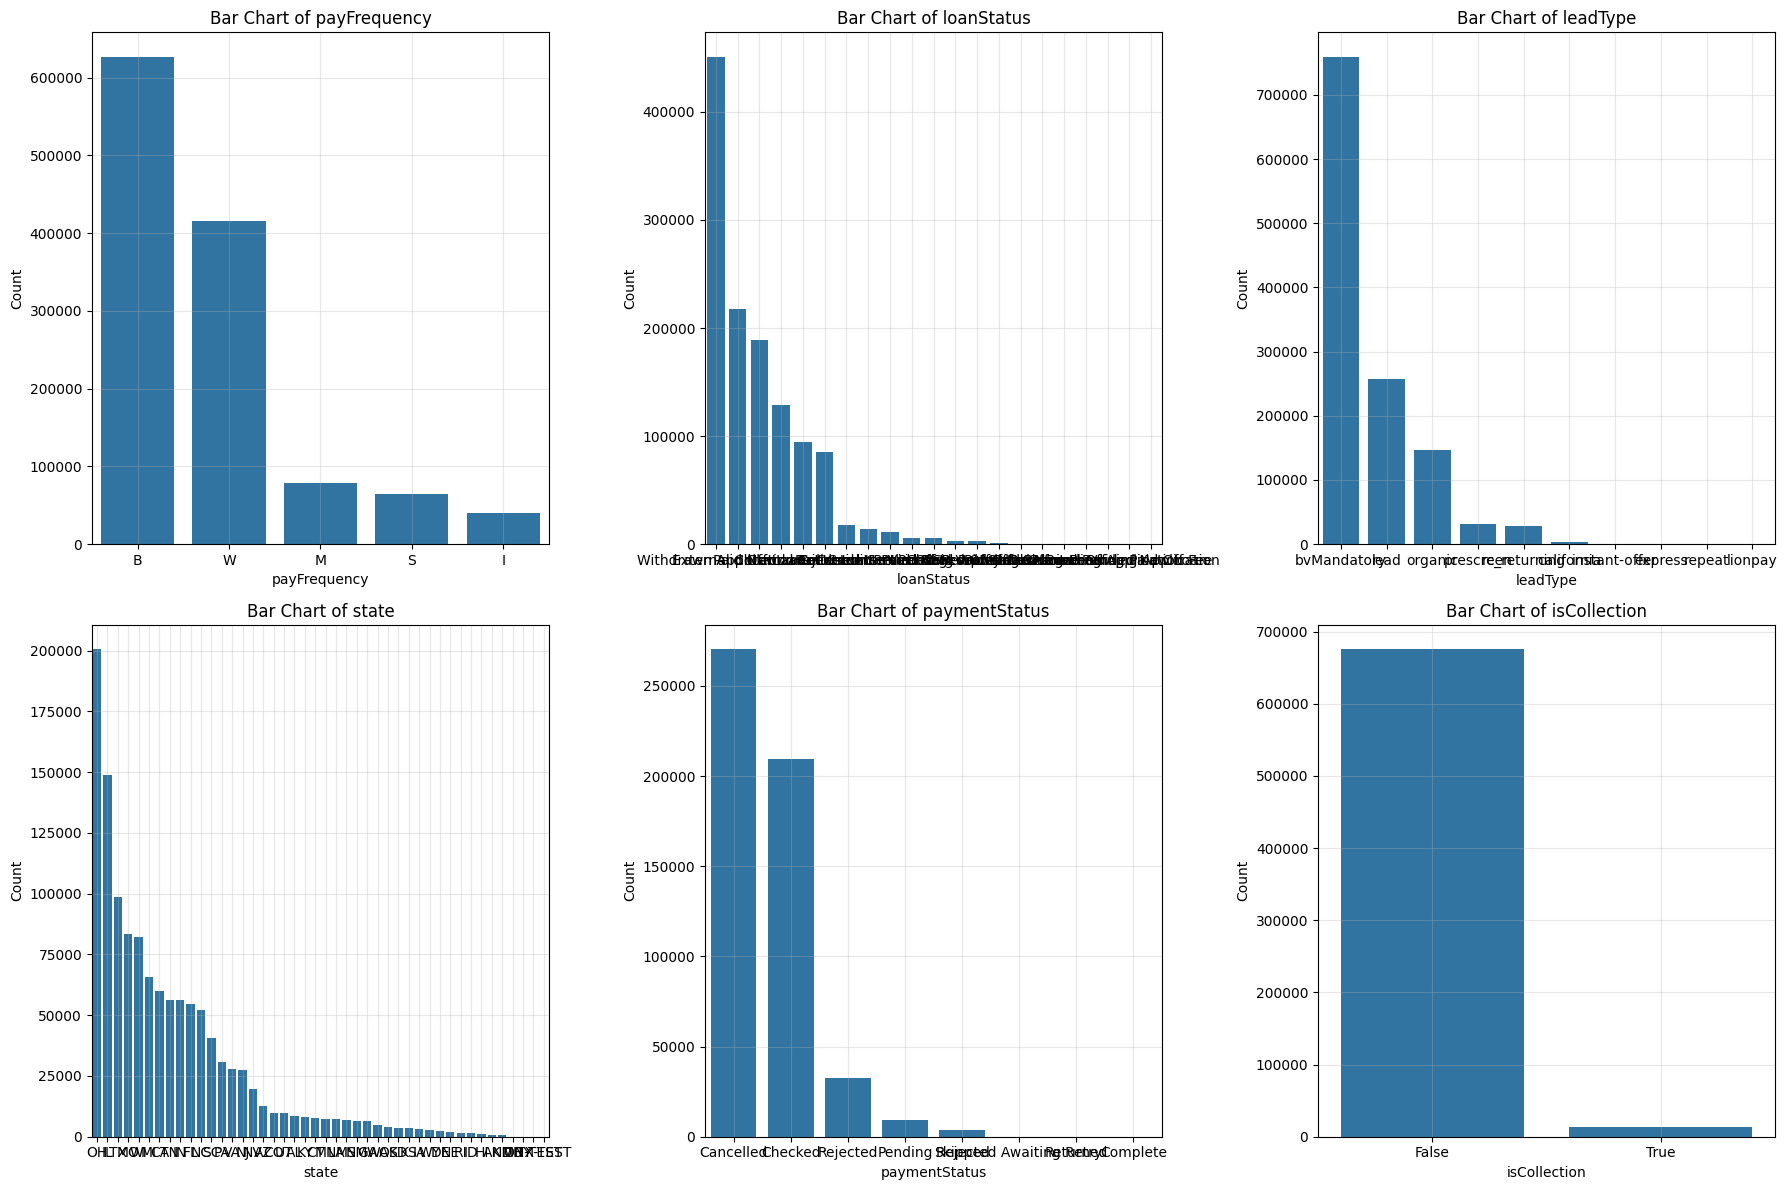

In [47]:
# plot bar chart for payFrequency, loanStatus, lead_type, state, paymentStatus, isCollection
def plot_bar_charts(data, columns, figsize=(18, 12)):
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols  
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    for i, column in enumerate(columns):
        sns.countplot(data=data, x=column, ax=axes[i], order=data[column].value_counts().index)
        axes[i].set_title(f'Bar Chart of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].grid(True, alpha=0.3)
    # Hide empty subplots if any
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()
# Plot categorical columns in grid
categorical_columns = ['payFrequency', 'loanStatus', 'leadType', 'state', 'paymentStatus', 'isCollection']
plot_bar_charts(loan_payment, categorical_columns)

- Higher number of loan is `isCollection` = False, so the customer is not from custom plan where they face problem repaying
- Most payment frequency are either weekly or bi-weekly
- Most customer has lead type `byMandatory` which is a lead that has been purchased from a ping tree and requires a bank verification to be completed before a loan can be approved
- Most of the payment status are either cancelled or checked suggested there are successful payments however there are also a significant amount of scheduled payment being called off and not attempted
- We might need some handling on the category data to avoid high dimensionality like `loanStatus` and `state`

**We will make a `isRisky` column below to denote loan risk.**
- For bad loan here are some of the examples:
    - External Collection, Internal Collection, Returned Item, Charged Off, Charged Off Paid Off, Settled Bankruptcy, Settlement Paid Off, Settlement Pending Paid Off

- For good loan here are some of the examples:
    - Paid Off Loan, Pending Paid Off

- Excluded cases
    - Withdrawn Application, Rejected, Voided, Pending Rescind, Pending Application Fee and so on
    - Why?
        - To avoid confusing the model and causes data leakage

**Explanations**
- External Collection / Internal Collection: The loan is in default and efforts are being made to recover the funds. This is the most definitive "bad" status.
- Returned Item: The customer missed a payment due to insufficient funds. This is a very strong early indicator of high risk.
- Charged Off / Charged Off Paid Off: The company has written the debt off as a loss. This is the worst financial outcome.
- Settled Bankruptcy: The customer declared bankruptcy, a clear default event.
- Settlement Paid Off / Settlement Pending Paid Off: The company agreed to accept less than the full amount owed. While some money was recovered, it was still a loss compared to the original agreement. This is a "bad" outcome.
- Paid Off Loan: The ideal outcome. The loan was fully repaid.
- New Loan: The loan is currently active and, presumably, not yet showing signs of distress. For a predictive model, these are typically considered "good" at the time of data collection.
- Pending Paid Off: The loan is about to be successfully completed.
- Withdrawn Application: The customer never took out the loan. There is no repayment behavior to learn from. Exclude these.
- Rejected: The loan was rejected by MoneyLion's existing underwriting rules. If you include these as "bad," your model will simply learn to copy the old rules, not to find new patterns of risk in approved loans. This is a form of target leakage. You want to build a model that assesses risk on applications that would be or were approved. Exclude these.
- All Voided Statuses (Credit Return Void, Customer Voided New Loan, etc.): The loan was approved but never funded or was canceled immediately. Like withdrawn applications, there is no repayment behavior. Exclude these.
- All other Pending Statuses (Pending Rescind, Pending Application Fee, etc.): The loan process is not complete. There is no final outcome to learn from. Exclude these.

In [48]:
# Create isRisky column based on loanStatus
def map_loan_risk(loan_status):
    """
    Map loan status to risk categories
    Returns: 1 for risky (bad loan), 0 for good loan, NaN for excluded
    """
    if pd.isna(loan_status):
        return np.nan
    
    # Bad loan statuses (risky = 1)
    bad_loan_statuses = [
        'External Collection', 
        'Internal Collection', 
        'Returned Item', 
        'Charged Off', 
        'Charged Off Paid Off', 
        'Settled Bankruptcy', 
        'Settlement Paid Off', 
        'Settlement Pending Paid Off'
    ]
    
    # Good loan statuses (risky = 0)
    good_loan_statuses = [
        'Paid Off Loan', 
        'New Loan',
        'Pending Paid Off'
    ]
    
    if loan_status in bad_loan_statuses:
        return 1  # Risky loan
    elif loan_status in good_loan_statuses:
        return 0  # Good loan
    else:
        return np.nan  # Excluded cases

# Apply the mapping
loan_payment['isRisky'] = loan_payment['loanStatus'].apply(map_loan_risk)

# drop the loanStatus column as it is no longer needed
loan_payment = loan_payment.drop(columns=['loanStatus'])

# Check the distribution of the new target variable
print("Distribution of isRisky:")
print(loan_payment['isRisky'].value_counts(dropna=False))

# Check how many rows will be excluded (NaN values)
excluded_count = loan_payment['isRisky'].isna().sum()
total_count = len(loan_payment)
print(f"\nExcluded cases: {excluded_count} out of {total_count} ({excluded_count/total_count*100:.2f}%)")

Distribution of isRisky:
isRisky
NaN    555207
1.0    351150
0.0    320737
Name: count, dtype: int64

Excluded cases: 555207 out of 1227094 (45.25%)


- Almost half the data is excluded. They will not be included in the model training to avoid confusing the model and causing data leakage.
- Moreover, we can see that the class is not imbalanced and we have an almost balanced dataset.

```txt
Total Samples: 351,150 + 320,737 = 671,887
Percentage of Class 1.0: (351,150 / 671,887) * 100 ≈ 52.3%
Percentage of Class 0.0: (320,737 / 671,887) * 100 ≈ 47.7%
```

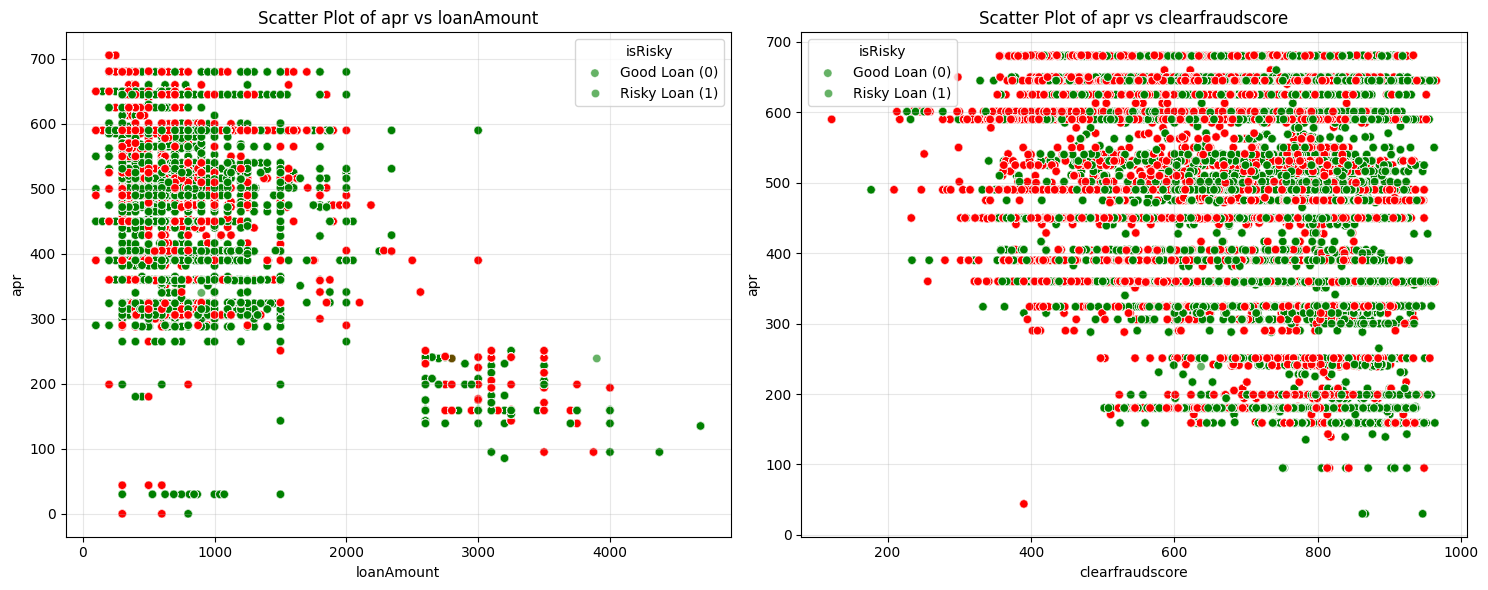

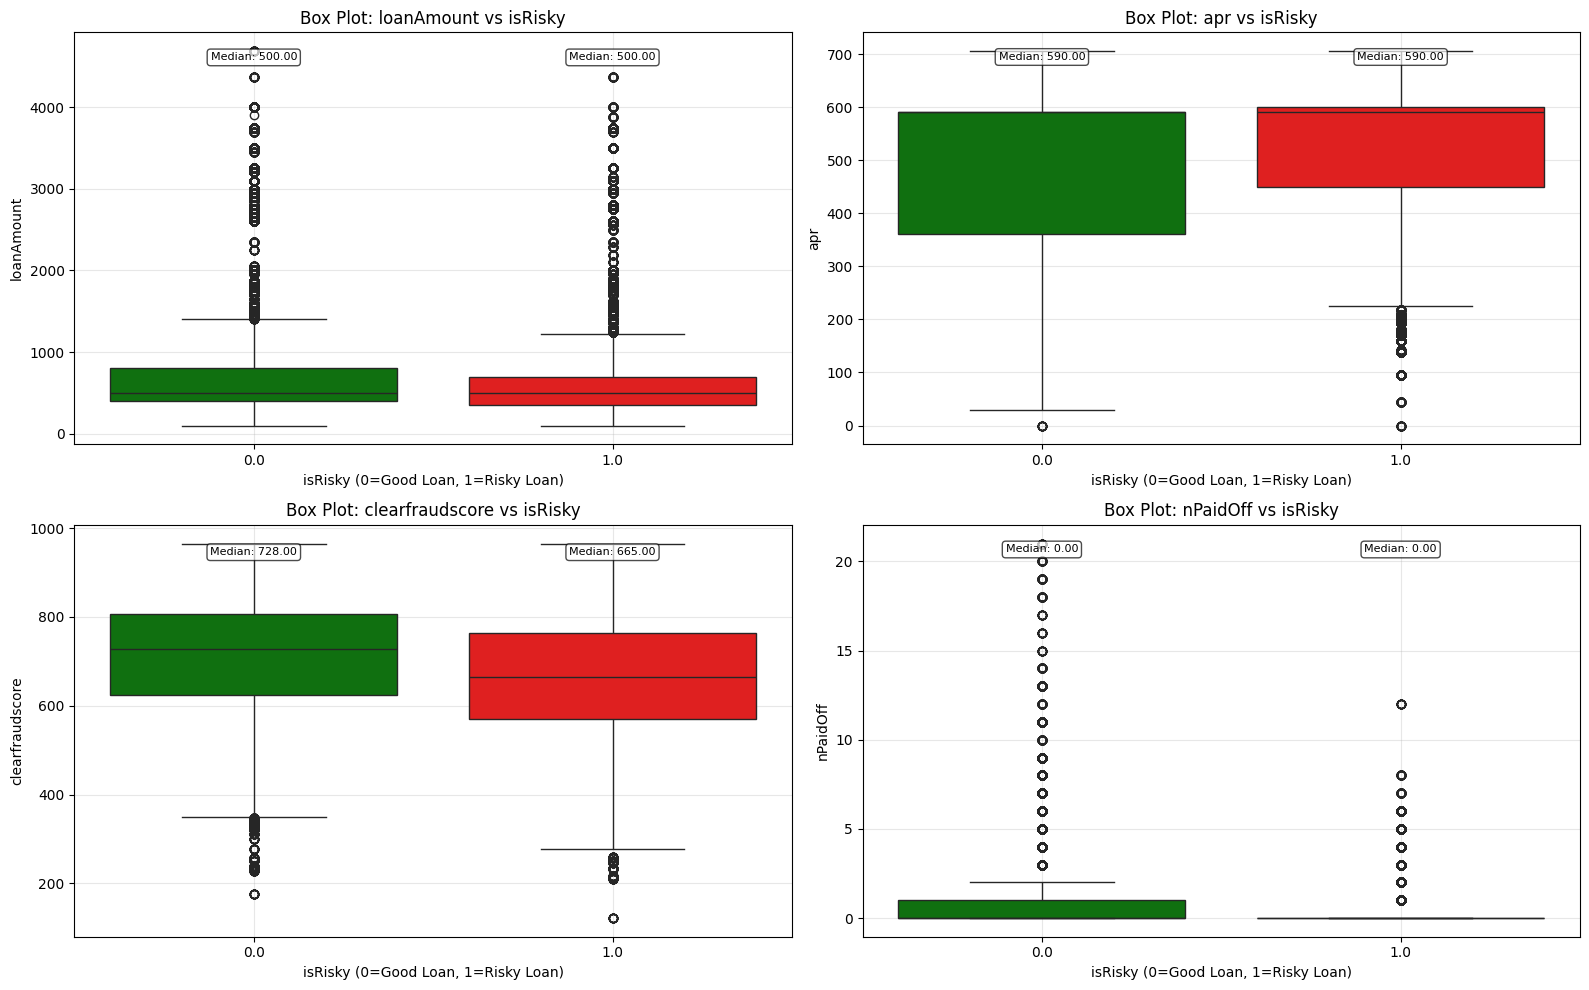

In [49]:
# plot scatter plot for apr vs. loanAmount and clearFraudScore vs. apr side by side with isRisky coloring
def plot_scatter_side_by_side(data, x_cols, y_col, color_col, figsize=(15, 6)):
    # Filter out NaN values in the color column
    data_filtered = data.dropna(subset=[color_col])
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    for i, x_col in enumerate(x_cols):
        # Filter out NaN values for the specific x column
        plot_data = data_filtered.dropna(subset=[x_col, y_col])
        
        sns.scatterplot(data=plot_data, x=x_col, y=y_col, hue=color_col, 
                       alpha=0.6, ax=axes[i], palette=['green', 'red'])
        axes[i].set_title(f'Scatter Plot of {y_col} vs {x_col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend(title='isRisky', labels=['Good Loan (0)', 'Risky Loan (1)'])
    
    plt.tight_layout()
    plt.show()

# Plot both scatter plots side by side with isRisky coloring
plot_scatter_side_by_side(loan_payment, ['loanAmount', 'clearfraudscore'], 'apr', 'isRisky')

# Function to create box plots for numerical variables vs isRisky
def plot_boxplots_vs_risky(data, numeric_cols, target_col='isRisky', figsize=(16, 10)):
    # Filter out NaN values in the target column
    data_filtered = data.dropna(subset=[target_col])
    
    # Calculate grid dimensions
    n_cols = 2
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numeric_cols):
        # Filter out NaN values for the specific numeric column
        plot_data = data_filtered.dropna(subset=[col])
        
        sns.boxplot(data=plot_data, x=target_col, y=col, ax=axes[i], 
                   palette=['green', 'red'])
        axes[i].set_title(f'Box Plot: {col} vs {target_col}')
        axes[i].set_xlabel('isRisky (0=Good Loan, 1=Risky Loan)')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)
        
        # Add statistical summary
        for risk_level in [0, 1]:
            if risk_level in plot_data[target_col].values:
                subset = plot_data[plot_data[target_col] == risk_level][col]
                median_val = subset.median()
                axes[i].text(risk_level, axes[i].get_ylim()[1] * 0.95, 
                           f'Median: {median_val:.2f}', 
                           ha='center', va='top', fontsize=8,
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    # Hide empty subplots if any
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Create box plots for the specified variables
variables_for_boxplot = ['loanAmount', 'apr', 'clearfraudscore', 'nPaidOff']
plot_boxplots_vs_risky(loan_payment, variables_for_boxplot)

**Scatterplot**
- No clear separation is detected in the plot
- Loan risk relationship with these variables are likely to be more complex

**Barchart**
- Median loan amount is identical for good and bad loans with big overalap
- Median APR is also identical for good and bad loans with a bigger distribution for good loans and more outliers for bad loans with lower APR
    - A significant number of them were issued with surprisingly low rates. This could be due to specific underwriting decisions, collateral-based loans, or other factors that don't fit the typical high-risk profile.
- Median fraudscore for good loan is higher and the distribution of it also shifted higher than bad loans
- Most of the applications have no history of paid-off loans, this variable probably does not contribute much to the model

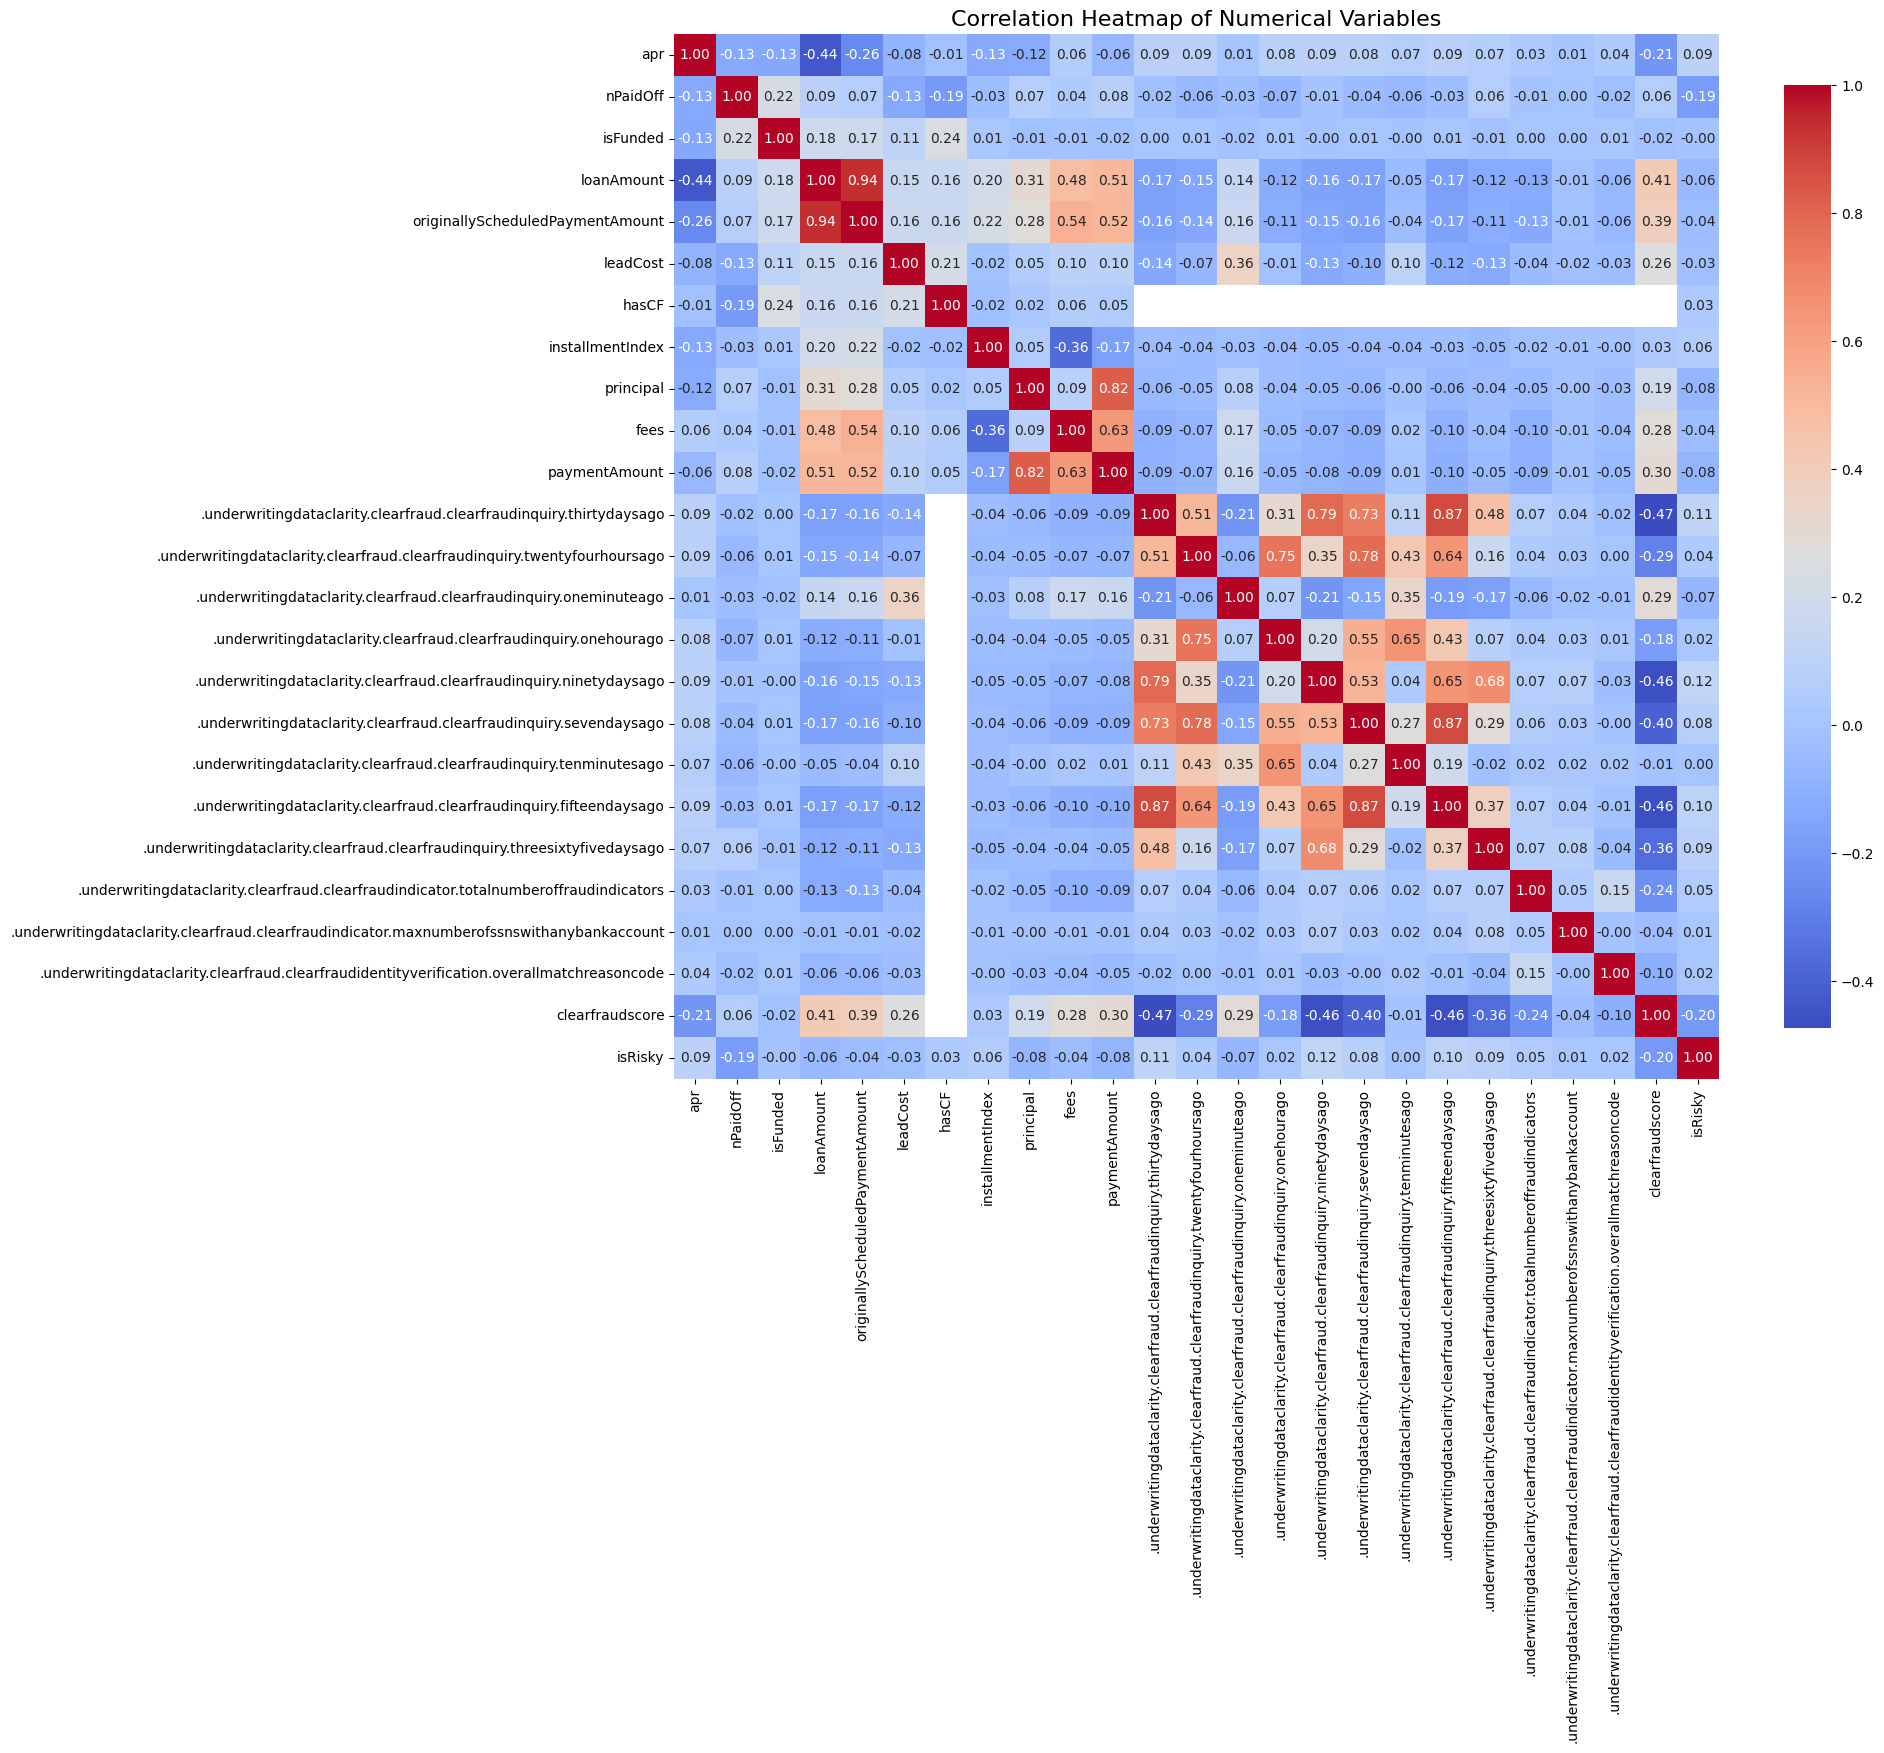

In [50]:
# exclude hasCF
temp = loan_payment.dropna(subset=['hasCF'])

# plot correlation heatmap for numerical variables
def plot_correlation_heatmap(data, figsize=(20, 18)):
    """
    Plots a correlation heatmap for numerical variables, handling long labels.
    """
    # Filter out non-numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a heatmap
    sns.heatmap(corr_matrix, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                square=True, 
                ax=ax, # Draw the heatmap on the ax object
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    # Adjust layout to make sure everything fits without overlapping
    plt.tight_layout()
    
    plt.show()

# Call the function with your DataFrame
plot_correlation_heatmap(temp)

- We will extract the highest 5 and lowest 5 correlation variables for interpretation
- It appears no variable has a particular strong correlation with `isRisky` suggesting the complexity of identifying risky loans

In [51]:
# Get correlation matrix for numerical variables from actual data
def get_top_correlations(data, target_col='isRisky', n_top=5):
    """
    Find the top 5 highest and lowest correlation pairs from the dataset
    """
    # Filter out non-numeric columns and remove rows with NaN in target
    data_clean = data.dropna(subset=[target_col])
    numeric_data = data_clean.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Get upper triangle of correlation matrix to avoid duplicates
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Convert to series and sort
    correlation_pairs = upper_triangle.stack().sort_values(ascending=False)
    
    print("=== TOP 5 HIGHEST CORRELATIONS ===")
    print(correlation_pairs.head(n_top))
    
    print(f"\n=== TOP 5 LOWEST CORRELATIONS ===")
    print(correlation_pairs.tail(n_top))
    
    return correlation_pairs

# Use your actual loan_payment data instead of dummy data
correlation_pairs = get_top_correlations(temp)

=== TOP 5 HIGHEST CORRELATIONS ===
loanAmount                                                           originallyScheduledPaymentAmount                                        0.953460
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago   .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago    0.871009
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago    0.867733
principal                                                            paymentAmount                                                           0.821430
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago     0.790878
dtype: float64

=== TOP 5 LOWEST CORRELATIONS ===
nPaidOff                                                              hasCF             -0.407321
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysag

**The Top**
- `loanAmount and originallyScheduledPaymentAmount`
    - Larger amount would result in larger repayment amount
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago and .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago`
    - If consumer make many inquiries in the past 7 days it will also reflected in the 15 day count
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago and .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago`
    - Logical as 15 day inquiries are a subset of 30 day inquiries
- `principal and paymentAmount`
    - Higher principal portion of a payment will lead to higher total payment amount
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago and .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago`
    - Inquiries made in the past 30 days is part of the total inquiries made in the last 90 days

**The Bottom**
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago and clearfraudscore`
    - More recent inquiries may be seen as a sign of higher risk reducing the fraud score
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago and clearfraudscore`
    - Similar to the 7 days ago, but with a slightly lower correlation
    - Recent credit seeking behavior is a factor in determining default risk
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago and clearfraudscore`
    - Higher number of inquiries in the last 90 days associated with lower fraud score
- `.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago and clearfraudscore`
    - Similar to the 90 days ago, but with a slightly lower correlation
- `apr and loanAmount`
    - Larger loan are considered less risky
    - They can be given as lower interest to attract people borrowing them

## Preprocessing

**What to do:**
- Perform feature engineering
- Remove unnecessary columns
- Handle missing values and ways to impute them

In [52]:
# remove columns as they are identifiers and not useful for modeling
columns_to_remove = ['loanId', 'clarityFraudId', 'underwritingid', 'anon_ssn']
loan_payment = loan_payment.drop(columns=columns_to_remove)

# remove instances with NaN in isRisky
loan_payment = loan_payment.dropna(subset=['isRisky'])

# preview the data after removing unnecessary columns
display(loan_payment.head(n=3))

,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,isRisky
1,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,3000.0,6395.19,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,0.0
2,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,3000.0,6395.19,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,0.0
3,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,3000.0,6395.19,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,0.0


- We first remove the ID as we do not need them further
- We also remove the irrelevant classes in our target variable `isRisky`

In [53]:
# calculate the missing values in the merged dataset
missing_values = loan_payment.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in the merged dataset:")
display(missing_values)

Missing values in the merged dataset:


payFrequency                                                                                      1
originatedDate                                                                                    5
nPaidOff                                                                                        383
fpStatus                                                                                        125
installmentIndex                                                                                109
                                                                                              ...  
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode         642726
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode     609181
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch               116242
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode    116242


**The Missingness**
- For a tree-based model like LightGBM, it's often more powerful to make the "missingness" itself a piece of information rather than trying to perfectly guess the original value. The model can learn if the absence of a value is correlated with risk.
- We will use median for numerical variables as financial data is often skewed and median is a safer and more representative choice
- For numerical column with missing values we will also added a `is_missing` indicator to flag the missingness
- Furthermore, for categorical variables we will just impute them with a special class like `unknown` or `missing` to indicate the missingness

### Feature Engineering

**What to do:**
- Engineer the date columns like finding date differences, extracting year, month, day, etc.

In [54]:
# find the days difference between applicationDate and originatedData
loan_payment['days_diff'] = (pd.to_datetime(loan_payment['originatedDate'], format='mixed') - pd.to_datetime(loan_payment['applicationDate'], format='mixed')).dt.days

# Or fill with -1 to indicate missing originated date
loan_payment['days_diff'] = loan_payment['days_diff'].fillna(-1)

# Convert applicationDate to datetime if not already done
loan_payment['applicationDate'] = pd.to_datetime(loan_payment['applicationDate'], format='mixed')

# Extract time-based components
loan_payment['application_month'] = loan_payment['applicationDate'].dt.month
loan_payment['application_day_of_week'] = loan_payment['applicationDate'].dt.dayofweek  # Monday=0, Sunday=6
loan_payment['application_day_of_month'] = loan_payment['applicationDate'].dt.day
loan_payment['application_week_of_year'] = loan_payment['applicationDate'].dt.isocalendar().week

# Create boolean flags
loan_payment['is_month_start'] = loan_payment['application_day_of_month'] <= 3  # First 3 days of month
loan_payment['is_month_end'] = loan_payment['application_day_of_month'] >= 28   # Last few days (28+ to handle Feb)
loan_payment['is_weekend'] = loan_payment['application_day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6

# Create binary feature for originated loans
loan_payment['is_originated'] = loan_payment['originatedDate'].notna()

- `days_diff`
    - Very Short Duration: A very quick origination might indicate a straightforward, low-risk applicant, or potentially a less thorough underwriting process.
    - Very Long Duration: A long delay could signify that the underwriting process was complex, requiring more documentation or verification, which could be associated with higher risk. It might also indicate that the applicant was initially hesitant.
- Data transformation
    - Applicants applying at the end of the month might be facing financial shortfalls. Similarly, applications on weekends versus weekdays could exhibit different risk profiles.

In [55]:
# remove date as they were being engineered
columns_to_remove = ['originatedDate']
loan_payment = loan_payment.drop(columns=columns_to_remove)

display(loan_payment.head(n=3))

,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,...,isRisky,days_diff,application_month,application_day_of_week,application_day_of_month,application_week_of_year,is_month_start,is_month_end,is_weekend,is_originated
1,B,199.0,2016-01-19 22:07:36.778,True,0.0,True,1,3000.0,6395.19,CA,...,0.0,0.0,1,1,19,3,False,False,False,True
2,B,199.0,2016-01-19 22:07:36.778,True,0.0,True,1,3000.0,6395.19,CA,...,0.0,0.0,1,1,19,3,False,False,False,True
3,B,199.0,2016-01-19 22:07:36.778,True,0.0,True,1,3000.0,6395.19,CA,...,0.0,0.0,1,1,19,3,False,False,False,True


### Imputations

**What to do:**
- For numerical variables, we will use median to fill the missing values and add a `is_missing` indicator column to flag the missingness.
- For categorical variables, we will impute them with a special class like `unknown` or `missing` to indicate the missingness.
- We will verify no missing values remain in the dataset before saving the processed data.

In [56]:
def handle_missing_values(df):
    """
    Comprehensive missing value handling strategy for LightGBM:
    1. Create missing indicators for numerical columns with missing values
    2. Impute numerical columns with median
    3. Impute categorical columns with 'missing' category
    """
    df_processed = df.copy()
    
    # Identify numerical and categorical columns
    numerical_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remove target variable and date from processing if it exists
    if 'isRisky' in numerical_columns:
        numerical_columns.remove('isRisky')
    
    print("=== MISSING VALUE HANDLING REPORT ===")
    print(f"Total columns: {len(df_processed.columns)}")
    print(f"Numerical columns: {len(numerical_columns)}")
    print(f"Categorical columns: {len(categorical_columns)}")
    
    # Handle numerical columns
    print("\n--- NUMERICAL COLUMNS ---")
    for col in numerical_columns:
        missing_count = df_processed[col].isnull().sum()
        if missing_count > 0:
            missing_pct = (missing_count / len(df_processed)) * 100
            print(f"{col}: {missing_count} missing ({missing_pct:.2f}%)")
            
            # Create missing indicator
            indicator_col = f"{col}_is_missing"
            df_processed[indicator_col] = df_processed[col].isnull().astype(int)
            
            # Impute with median
            median_value = df_processed[col].median()
            df_processed[col] = df_processed[col].fillna(median_value)
            
            print(f"  → Created indicator: {indicator_col}")
            print(f"  → Imputed with median: {median_value:.4f}")
        else:
            print(f"{col}: No missing values")
    
    # Handle categorical columns
    print("\n--- CATEGORICAL COLUMNS ---")
    for col in categorical_columns:
        missing_count = df_processed[col].isnull().sum()
        if missing_count > 0:
            missing_pct = (missing_count / len(df_processed)) * 100
            print(f"{col}: {missing_count} missing ({missing_pct:.2f}%)")
            
            # Impute with 'missing' category
            df_processed[col] = df_processed[col].fillna('missing')
            print(f"  → Imputed with 'missing' category")
        else:
            print(f"{col}: No missing values")
    
    # Summary
    remaining_missing = df_processed.isnull().sum().sum()
    print(f"\n=== SUMMARY ===")
    print(f"Remaining missing values: {remaining_missing}")
    print(f"Original shape: {df.shape}")
    print(f"Processed shape: {df_processed.shape}")
    
    # Show new columns created
    new_columns = [col for col in df_processed.columns if col.endswith('_is_missing')]
    if new_columns:
        print(f"Missing indicator columns created: {len(new_columns)}")
        for col in new_columns:
            print(f"  - {col}")
    
    return df_processed

# Apply the missing value handling
loan_payment_processed = handle_missing_values(loan_payment)

# Verify no missing values remain
print("\n=== VERIFICATION ===")
final_missing = loan_payment_processed.isnull().sum()
if final_missing.sum() == 0:
    print("✅ Success! No missing values remain in the dataset")
else:
    print("❌ Warning! Some missing values still exist:")
    print(final_missing[final_missing > 0])

=== MISSING VALUE HANDLING REPORT ===
Total columns: 85
Numerical columns: 29
Categorical columns: 48

--- NUMERICAL COLUMNS ---
apr: No missing values
nPaidOff: 383 missing (0.06%)
  → Created indicator: nPaidOff_is_missing
  → Imputed with median: 0.0000
isFunded: No missing values
loanAmount: No missing values
originallyScheduledPaymentAmount: No missing values
leadCost: No missing values
hasCF: No missing values
installmentIndex: 109 missing (0.02%)
  → Created indicator: installmentIndex_is_missing
  → Imputed with median: 9.0000
principal: 109 missing (0.02%)
  → Created indicator: principal_is_missing
  → Imputed with median: 27.6500
fees: 109 missing (0.02%)
  → Created indicator: fees_is_missing
  → Imputed with median: 51.3000
paymentAmount: 109 missing (0.02%)
  → Created indicator: paymentAmount_is_missing
  → Imputed with median: 86.3400
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago: 115827 missing (17.24%)
  → Created indicator: .underwritingdataclar

- Regarding the state column with high cardinality we will let LightGBM handle it as it can handle categorical variables natively without needing to one-hot encode them.

In [57]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def scale_numerical_features(df, target_col='isRisky', scaler_type='robust'):
    """
    Scale numerical features while preserving categorical features and target variable
    
    Parameters:
    df: DataFrame to scale
    target_col: Target variable to exclude from scaling
    scaler_type: 'standard' for StandardScaler or 'robust' for RobustScaler
    
    Returns:
    scaled_df: DataFrame with scaled numerical features
    scaler: Fitted scaler object for future use
    """
    df_scaled = df.copy()
    
    # Identify numerical columns (excluding target and boolean indicators)
    numerical_columns = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove target variable and boolean indicators from scaling
    columns_to_exclude = [target_col]
    
    # Exclude boolean indicators (like is_missing columns and engineered boolean features)
    boolean_columns = [col for col in numerical_columns if 
                      col.endswith('_is_missing') or 
                      col.startswith('is_') or
                      df_scaled[col].nunique() <= 2]  # Binary features
    
    columns_to_exclude.extend(boolean_columns)
    
    # Remove excluded columns from numerical columns list
    numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]
    
    print(f"=== FEATURE SCALING REPORT ===")
    print(f"Scaler type: {scaler_type.upper()}")
    print(f"Total numerical columns: {len(df_scaled.select_dtypes(include=[np.number]).columns)}")
    print(f"Columns to scale: {len(numerical_columns)}")
    print(f"Excluded columns: {len(columns_to_exclude)}")
    
    if numerical_columns:
        # Initialize scaler
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError("scaler_type must be 'standard' or 'robust'")
        
        print(f"\nColumns being scaled:")
        for col in numerical_columns:
            original_mean = df_scaled[col].mean()
            original_std = df_scaled[col].std()
            print(f"  - {col}: mean={original_mean:.4f}, std={original_std:.4f}")
        
        # Fit and transform the numerical columns
        df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
        
        print(f"\nAfter scaling:")
        for col in numerical_columns:
            scaled_mean = df_scaled[col].mean()
            scaled_std = df_scaled[col].std()
            print(f"  - {col}: mean={scaled_mean:.4f}, std={scaled_std:.4f}")
        
        print(f"\nExcluded columns (not scaled):")
        for col in columns_to_exclude:
            if col in df_scaled.columns:
                print(f"  - {col}")
        
    else:
        print("No numerical columns found to scale!")
        scaler = None
    
    return df_scaled, scaler

# Apply scaling to the processed data
print("Scaling numerical features...")
loan_payment_scaled, feature_scaler = scale_numerical_features(
    loan_payment_processed, 
    target_col='isRisky', 
    scaler_type='robust'  # Using RobustScaler as it's less sensitive to outliers
)

# Verify the scaling results
print(f"\n=== SCALING VERIFICATION ===")
print(f"Original shape: {loan_payment_processed.shape}")
print(f"Scaled shape: {loan_payment_scaled.shape}")

# Check if any values became NaN after scaling
nan_check = loan_payment_scaled.isnull().sum().sum()
if nan_check == 0:
    print("✅ No NaN values introduced during scaling")
else:
    print(f"❌ Warning: {nan_check} NaN values introduced during scaling")

Scaling numerical features...
=== FEATURE SCALING REPORT ===
Scaler type: ROBUST
Total numerical columns: 48
Columns to scale: 27
Excluded columns: 22

Columns being scaled:
  - apr: mean=521.5479, std=130.1295
  - nPaidOff: mean=0.3462, std=0.9597
  - loanAmount: mean=681.9567, std=576.8861
  - originallyScheduledPaymentAmount: mean=1879.9678, std=1562.1015
  - leadCost: mean=11.6552, std=20.7484
  - installmentIndex: mean=10.5682, std=8.0792
  - principal: mean=45.3626, std=80.0497
  - fees: mean=66.9306, std=59.6515
  - paymentAmount: mean=112.4187, std=104.6570
  - .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago: mean=6.8809, std=5.8630
  - .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago: mean=4.3096, std=3.0730
  - .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago: mean=2.2346, std=1.2926
  - .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago: mean=3.7990, std=2.4665
  - .underwritingdataclarity.clearfraud

In [58]:
# preview the data before saving
display(loan_payment_scaled.head(n=3))

,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago_is_missing,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago_is_missing,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago_is_missing,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago_is_missing,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago_is_missing,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago_is_missing,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators_is_missing,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount_is_missing,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode_is_missing,clearfraudscore_is_missing
1,B,-2.428571,2016-01-19 22:07:36.778,True,0.0,True,1,7.692308,4.885167,CA,...,0,0,0,0,0,0,0,0,0,0
2,B,-2.428571,2016-01-19 22:07:36.778,True,0.0,True,1,7.692308,4.885167,CA,...,0,0,0,0,0,0,0,0,0,0
3,B,-2.428571,2016-01-19 22:07:36.778,True,0.0,True,1,7.692308,4.885167,CA,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# save the processed data to a new CSV file
output_file = '../data/loan_payment_processed.csv'
loan_payment_processed.to_csv(output_file, index=False)
print(f"\nProcessed data saved to: {output_file}")


Processed data saved to: ../data/loan_payment_processed.csv


## Modeling

**What to do:**
- Train test and validation splitting of 70 | 15 | 15
- Build a LightGBM model to predict risk of loan applications
- Evaluate the model performance using appropriate metrics
- Save the model

**Note on Splitting Strategy**
- Due to the data being historical ranging from 2014 to 2017, I propose a time-based split to simulate a real-world scenario as:
    - Economic shift might happen over time
    - Applicant behavior may change over time
    - MoneyLion marketing might attract different types of applicants over time
- If we use a split without considering time we might leak information from the future into the past


### Time Splitting Strategy

In [60]:
# Analyze date distribution
print("Date range analysis:")
print(f"Min date: {loan_payment_processed['applicationDate'].min()}")
print(f"Max date: {loan_payment_processed['applicationDate'].max()}")
print(f"Total records: {len(loan_payment_processed)}")

# Sort by date to understand chronological distribution
loan_sorted = loan_payment_processed.sort_values('applicationDate')

# Calculate splitting points (common ratios: 70% train, 15% val, 15% test)
total_records = len(loan_sorted)
train_size = int(0.7 * total_records)
val_size = int(0.15 * total_records)

# Find the actual dates at these split points
train_end_date = loan_sorted.iloc[train_size]['applicationDate']
val_end_date = loan_sorted.iloc[train_size + val_size]['applicationDate']

print(f"\nSuggested split dates:")
print(f"Train period: {loan_sorted['applicationDate'].min()} to {train_end_date}")
print(f"Validation period: {train_end_date} to {val_end_date}")
print(f"Test period: {val_end_date} to {loan_sorted['applicationDate'].max()}")

# Show data distribution
print(f"\nData distribution:")
print(f"Train set: {train_size} records ({train_size/total_records*100:.1f}%)")
print(f"Validation set: {val_size} records ({val_size/total_records*100:.1f}%)")
print(f"Test set: {total_records - train_size - val_size} records ({(total_records - train_size - val_size)/total_records*100:.1f}%)")

# Create the actual splits
train_data = loan_sorted[loan_sorted['applicationDate'] <= train_end_date]
val_data = loan_sorted[(loan_sorted['applicationDate'] > train_end_date) & 
                       (loan_sorted['applicationDate'] <= val_end_date)]
test_data = loan_sorted[loan_sorted['applicationDate'] > val_end_date]

# remove the applicationDate column as it is no longer needed
train_data = train_data.drop(columns=['applicationDate'])
val_data = val_data.drop(columns=['applicationDate'])
test_data = test_data.drop(columns=['applicationDate'])

print(f"\nActual split sizes:")
print(f"Train: {len(train_data)} records")
print(f"Validation: {len(val_data)} records") 
print(f"Test: {len(test_data)} records")

Date range analysis:
Min date: 2014-12-03 00:31:22.306000
Max date: 2017-03-18 23:49:05.292000
Total records: 671887

Suggested split dates:
Train period: 2014-12-03 00:31:22.306000 to 2016-12-19 02:41:10.739000
Validation period: 2016-12-19 02:41:10.739000 to 2017-01-28 08:57:03.467000
Test period: 2017-01-28 08:57:03.467000 to 2017-03-18 23:49:05.292000

Data distribution:
Train set: 470320 records (70.0%)
Validation set: 100783 records (15.0%)
Test set: 100784 records (15.0%)

Actual split sizes:
Train: 470332 records
Validation: 100795 records
Test: 100760 records


### Model Building

In [61]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
import joblib
import optuna

# Prepare the data for LightGBM
def prepare_lgb_data(train_data, val_data, test_data, target_col='isRisky'):
    """
    Prepare data for LightGBM training with proper categorical feature handling
    """
    # Separate features and target
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    
    X_val = val_data.drop(columns=[target_col])
    y_val = val_data[target_col]
    
    X_test = test_data.drop(columns=[target_col])
    y_test = test_data[target_col]
    
    # Identify categorical columns (object and category types)
    categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Categorical columns found: {len(categorical_columns)}")
    for col in categorical_columns:
        print(f"  - {col}: {X_train[col].nunique()} unique values")
        
        # Convert to category dtype for LightGBM's native support
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')
        X_test[col] = X_test[col].astype('category')
    
    print(f"\nFinal data shapes:")
    print(f"Train: {X_train.shape}, Target: {y_train.shape}")
    print(f"Validation: {X_val.shape}, Target: {y_val.shape}")
    print(f"Test: {X_test.shape}, Target: {y_test.shape}")
    
    # Verify data types
    print(f"\nData types check:")
    object_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    if object_cols:
        print(f"WARNING: Object columns still present: {object_cols}")
    else:
        print("✅ No object columns remaining")
    
    categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
    print(f"Category columns: {categorical_cols}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test, categorical_columns

# Prepare the data
X_train, X_val, X_test, y_train, y_val, y_test, categorical_columns = prepare_lgb_data(
    train_data, val_data, test_data
)

Categorical columns found: 48
  - payFrequency: 6 unique values
  - state: 40 unique values
  - leadType: 8 unique values
  - fpStatus: 8 unique values
  - isCollection: 3 unique values
  - paymentDate: 16654 unique values
  - paymentStatus: 9 unique values
  - paymentReturnCode: 31 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk: 3 unique values
  - .underwritingdataclarity.clearfraud.clearfraudindicato

In [62]:
# Define hyperparameter optimization with Optuna
def objective(trial):
    """
    Objective function for Optuna hyperparameter optimization
    """
    # Suggest hyperparameters
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'verbosity': -1,
        'random_state': 42
    }
    
    # Use Stratified K-Fold for robust validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        X_fold_train = X_train.iloc[train_idx]
        X_fold_val = X_train.iloc[val_idx]
        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]
        
        # Create LightGBM datasets
        train_dataset = lgb.Dataset(
            X_fold_train, 
            label=y_fold_train,
            categorical_feature=categorical_columns
        )
        val_dataset = lgb.Dataset(
            X_fold_val, 
            label=y_fold_val,
            categorical_feature=categorical_columns,
            reference=train_dataset
        )
        
        # Train model
        model = lgb.train(
            params,
            train_dataset,
            num_boost_round=1000,
            valid_sets=[val_dataset],
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
        )
        
        # Predict and calculate AUC
        y_pred_proba = model.predict(X_fold_val, num_iteration=model.best_iteration)
        auc_score = roc_auc_score(y_fold_val, y_pred_proba)
        auc_scores.append(auc_score)
    
    return np.mean(auc_scores)

# Run hyperparameter optimization
print("Starting hyperparameter optimization with Optuna...")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=2)  # Adjust n_trials based on your time budget

print(f"Best parameters: {study.best_params}")
print(f"Best cross-validation AUC: {study.best_value:.4f}")

[I 2025-08-04 12:05:29,224] A new study created in memory with name: no-name-59354f14-a31a-4435-9772-e3ce81d50f71


Starting hyperparameter optimization with Optuna...
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.998448
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[991]	valid_0's auc: 0.998365
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[990]	valid_0's auc: 0.998507
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.998626
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[990]	valid_0's auc: 0.998483


[I 2025-08-04 12:12:49,678] Trial 0 finished with value: 0.9984858576037222 and parameters: {'num_leaves': 118, 'learning_rate': 0.2536999076681772, 'feature_fraction': 0.839196365086843, 'bagging_fraction': 0.759195090518222, 'bagging_freq': 2, 'min_child_samples': 19, 'lambda_l1': 3.3323645788192616e-08, 'lambda_l2': 0.6245760287469893}. Best is trial 0 with value: 0.9984858576037222.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.999906
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.999873
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.99988
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.999876
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.999925


[I 2025-08-04 12:19:26,373] Trial 1 finished with value: 0.9998920199922587 and parameters: {'num_leaves': 184, 'learning_rate': 0.11114989443094977, 'feature_fraction': 0.41235069657748147, 'bagging_fraction': 0.9819459112971965, 'bagging_freq': 6, 'min_child_samples': 25, 'lambda_l1': 4.329370014459266e-07, 'lambda_l2': 4.4734294104626844e-07}. Best is trial 1 with value: 0.9998920199922587.


Best parameters: {'num_leaves': 184, 'learning_rate': 0.11114989443094977, 'feature_fraction': 0.41235069657748147, 'bagging_fraction': 0.9819459112971965, 'bagging_freq': 6, 'min_child_samples': 25, 'lambda_l1': 4.329370014459266e-07, 'lambda_l2': 4.4734294104626844e-07}
Best cross-validation AUC: 0.9999


**What Happened:**
- We use each trial to seek for the best parameters
- We use stratified k-fold cross validation so the class distribution is preserved in each fold 
- We use the best parameters to train the model on the training set
    - 5 folds we will have 1 set holdout the other for training, and then repeat for 5 times
- Although we have a large round to give the model to learn, but we will have early stopping of 50 if the performance does not improve for 50 rounds
- The optuna will monitor the AUC and optimize the parameter accordingly

In [63]:
# Train the final model with best parameters
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
})

print("Training final LightGBM model with best parameters...")

# Create LightGBM datasets
lgb_train = lgb.Dataset(
    X_train, 
    label=y_train,
    categorical_feature=categorical_columns
)

lgb_val = lgb.Dataset(
    X_val, 
    label=y_val,
    categorical_feature=categorical_columns,
    reference=lgb_train
)

# Train the final model
final_model = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=2000,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(100),
        lgb.log_evaluation(100)
    ]
)

print(f"Training completed. Best iteration: {final_model.best_iteration}")

Training final LightGBM model with best parameters...
Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.973063	valid's auc: 0.764014
Early stopping, best iteration is:
[9]	train's auc: 0.898476	valid's auc: 0.797575
Training completed. Best iteration: 9


**What Happened:**
- We will copy the best parameter from optuna here
- We will then train the model again

### Model Evaluation

In [64]:
# Comprehensive model evaluation
def evaluate_model_comprehensive(model, X_test, y_test, X_val, y_val, model_name="LightGBM"):
    """
    Comprehensive evaluation of the trained model
    """
    print(f"=== {model_name} MODEL EVALUATION ===\n")
    
    # Predictions on test set
    y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
    y_test_pred = (y_test_pred_proba >= 0.5).astype(int)
    y_valid_pred_proba = model.predict(X_val, num_iteration=model.best_iteration)
    y_valid_pred = (y_valid_pred_proba >= 0.5).astype(int)
    
    # 1. Classification Reports
    print("\n--- TEST SET PERFORMANCE ---")
    print(classification_report(y_test, y_test_pred, target_names=['Good Loan', 'Risky Loan']))
    print("\n--- VALIDATION SET PERFORMANCE ---")
    print(classification_report(y_val, y_valid_pred, target_names=['Good Loan', 'Risky Loan']))

    # 2. AUC-ROC Scores
    test_auc = roc_auc_score(y_test, y_test_pred_proba)
    valid_auc = roc_auc_score(y_val, y_valid_pred_proba)
    
    print(f"\n--- AUC-ROC SCORES ---")
    print(f"Test AUC-ROC: {test_auc:.4f}")
    print(f"Validation AUC-ROC: {valid_auc:.4f}")
    
    # 3. Average Precision Scores
    test_ap = average_precision_score(y_test, y_test_pred_proba)
    valid_ap = average_precision_score(y_val, y_valid_pred_proba)

    print(f"\n--- AVERAGE PRECISION SCORES ---")
    print(f"Test Average Precision: {test_ap:.4f}")
    print(f"Validation Average Precision: {valid_ap:.4f}")
    
    return {
        'test_auc': test_auc,
        'test_ap': test_ap,
        'valid_auc': valid_auc,
        'valid_ap': valid_ap,
        'y_val_pred_proba': y_valid_pred_proba,
        'y_test_pred_proba': y_test_pred_proba
    }

# Evaluate the model
evaluation_results = evaluate_model_comprehensive(final_model, X_test, y_test, X_val, y_val)

=== LightGBM MODEL EVALUATION ===


--- TEST SET PERFORMANCE ---
              precision    recall  f1-score   support

   Good Loan       0.81      0.42      0.55     63671
  Risky Loan       0.45      0.82      0.59     37089

    accuracy                           0.57    100760
   macro avg       0.63      0.62      0.57    100760
weighted avg       0.68      0.57      0.57    100760


--- VALIDATION SET PERFORMANCE ---
              precision    recall  f1-score   support

   Good Loan       0.78      0.60      0.68     55769
  Risky Loan       0.62      0.79      0.69     45026

    accuracy                           0.69    100795
   macro avg       0.70      0.70      0.69    100795
weighted avg       0.71      0.69      0.69    100795


--- AUC-ROC SCORES ---
Test AUC-ROC: 0.7500
Validation AUC-ROC: 0.7976

--- AVERAGE PRECISION SCORES ---
Test Average Precision: 0.7083
Validation Average Precision: 0.7968


**What Happened:**
- For our hidden test set performance the accuracy is low and meaning it gets prediction wrong quite often
- Nonetheless, the model is good at finding risky loans as seen from the recall. With a score of `0.82` it identifies the risky loans 82% of the time which is good.
- The risky loan precision of `0.45` for risky loan means that for all the predicted risky loans only 45% are actually true, that means a great amount of good loan are falsely flagged
- With good loans recall is `0.42` suggesting the actually good one the model can only get 42% of time which can cause a good amount of customers to be wrongly flagged.
- This can lead to lost revenue

**What to do:**
- We use a 0.5 threshold to classify the loans as risky or not risky so we might need to adjust it 
- We will also see the precision-recall curve to see how we need to make the adjustment
- Furthermore, is false negative more costly or false positive more costly
    - False negative (falsely identify as not risky) will lead to financial loss
        - This is more costly as risky transactions are allowed to proceed
        - In our case we might be lending out and cannot recover the money
    - False positive (falsely identify as risky) will lead to operational cost and lost opportunity
        - Less costly where the team will investigate the transaction and customer might change services as their service is being blocked

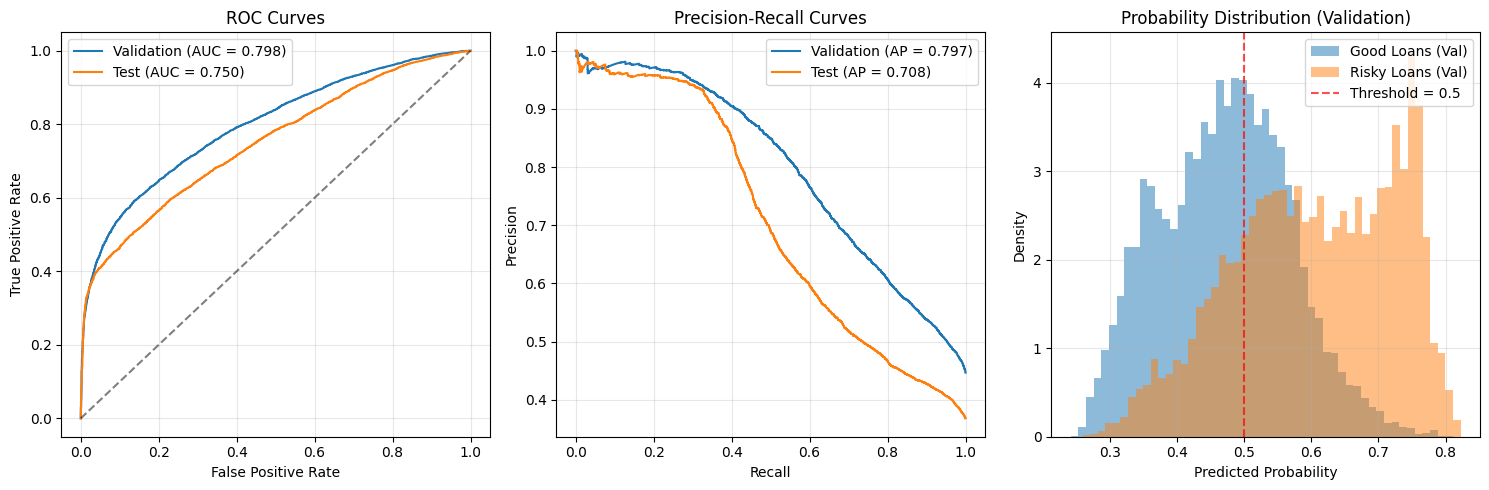

In [65]:
# Plot ROC curves and Precision-Recall curves
def plot_evaluation_curves(y_val, y_test, y_val_pred_proba, y_test_pred_proba, figsize=(15, 5)):
    """
    Plot ROC curves and Precision-Recall curves for validation and test sets
    """
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # 1. ROC Curves
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    
    axes[0].plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_score(y_val, y_val_pred_proba):.3f})')
    axes[0].plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, y_test_pred_proba):.3f})')
    axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curves')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Precision-Recall Curves
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_pred_proba)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba)
    
    # note ap is average precision 
    axes[1].plot(recall_val, precision_val, label=f'Validation (AP = {average_precision_score(y_val, y_val_pred_proba):.3f})')
    axes[1].plot(recall_test, precision_test, label=f'Test (AP = {average_precision_score(y_test, y_test_pred_proba):.3f})')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Curves')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Probability Distribution
    axes[2].hist(y_val_pred_proba[y_val == 0], bins=50, alpha=0.5, label='Good Loans (Val)', density=True)
    axes[2].hist(y_val_pred_proba[y_val == 1], bins=50, alpha=0.5, label='Risky Loans (Val)', density=True)
    axes[2].axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Threshold = 0.5')
    axes[2].set_xlabel('Predicted Probability')
    axes[2].set_ylabel('Density')
    axes[2].set_title('Probability Distribution (Validation)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot the evaluation curves
plot_evaluation_curves(
    y_val, y_test, 
    evaluation_results['y_val_pred_proba'], 
    evaluation_results['y_test_pred_proba']
)

**What Happened:**
- ROC Curve
    - We can see the model has a good discriminative ability better than random guessing
    - However, there's a gap between the hidden test set and validation set where model might slightly overfit train and validation data
    - The test set only contains post-2017 data and the model does not generalize well in that case is a realistic outcome (economic shift, people behavior change, etc.)
- Precision-Recall Curves
    - From the curve, if we want a recall of 0.8 (identified 80% of risky loans) we will have a precision of close of 0.5, this corresponds to the report we created earlier 
- Threshold
    - We plot it using validation set as the test set should be hidden and unknown all the time
    - We can see a significant overlapping region of confusion in between the two class
    - For a large orange (risky) area to the right, they are risky so we have high recall meaning we correctly capture them
    - But for a large blue (good) are to the right we also flagged them as risky (false positive) which leads to a poor precision for the model

In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score

def find_optimal_thresholds(y_true, y_pred_proba, min_recall_target=0.7):
    """
    Find optimal thresholds using different strategies
    
    Strategy A: Maximize F1-Score
    Strategy B: Achieve minimum recall while maximizing precision
    """
    # Generate a range of thresholds
    thresholds = np.arange(0.1, 0.9, 0.01)
    
    # Strategy A: F1-Score Optimization
    f1_scores = []
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        
        f1 = f1_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        
        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)
    
    # Find best F1 threshold
    best_f1_idx = np.argmax(f1_scores)
    best_f1_threshold = thresholds[best_f1_idx]
    best_f1_score = f1_scores[best_f1_idx]
    
    # Strategy B: Minimum Recall Constraint
    # Find thresholds that achieve at least the minimum recall
    valid_indices = np.where(np.array(recalls) >= min_recall_target)[0]
    
    if len(valid_indices) > 0:
        # Among valid thresholds, find the one with highest precision
        valid_precisions = np.array(precisions)[valid_indices]
        best_precision_idx = valid_indices[np.argmax(valid_precisions)]
        best_recall_threshold = thresholds[best_precision_idx]
        best_recall_precision = precisions[best_precision_idx]
        best_recall_recall = recalls[best_precision_idx]
    else:
        # If no threshold achieves minimum recall, find the one with highest recall
        best_recall_idx = np.argmax(recalls)
        best_recall_threshold = thresholds[best_recall_idx]
        best_recall_precision = precisions[best_recall_idx]
        best_recall_recall = recalls[best_recall_idx]
        print(f"⚠️  Warning: No threshold achieves {min_recall_target:.0%} recall")
        print(f"   Best achievable recall: {best_recall_recall:.3f} at threshold {best_recall_threshold:.3f}")
    
    results = {
        'thresholds': thresholds,
        'f1_scores': f1_scores,
        'precisions': precisions,
        'recalls': recalls,
        'strategy_a': {
            'threshold': best_f1_threshold,
            'f1_score': best_f1_score,
            'precision': precisions[best_f1_idx],
            'recall': recalls[best_f1_idx]
        },
        'strategy_b': {
            'threshold': best_recall_threshold,
            'precision': best_recall_precision,
            'recall': best_recall_recall,
            'f1_score': f1_score(y_true, (y_pred_proba >= best_recall_threshold).astype(int))
        }
    }
    
    return results

# Apply threshold optimization on validation set
print("=== THRESHOLD OPTIMIZATION ON VALIDATION SET ===")
threshold_results = find_optimal_thresholds(
    y_val, 
    evaluation_results['y_val_pred_proba'], 
    min_recall_target=0.7
)

print("\n--- STRATEGY A: F1-Score Maximization ---")
strategy_a = threshold_results['strategy_a']
print(f"Optimal Threshold: {strategy_a['threshold']:.3f}")
print(f"F1-Score: {strategy_a['f1_score']:.3f}")
print(f"Precision: {strategy_a['precision']:.3f}")
print(f"Recall: {strategy_a['recall']:.3f}")

print("\n--- STRATEGY B: Minimum 70% Recall ---")
strategy_b = threshold_results['strategy_b']
print(f"Optimal Threshold: {strategy_b['threshold']:.3f}")
print(f"Precision: {strategy_b['precision']:.3f}")
print(f"Recall: {strategy_b['recall']:.3f}")
print(f"F1-Score: {strategy_b['f1_score']:.3f}")

=== THRESHOLD OPTIMIZATION ON VALIDATION SET ===

--- STRATEGY A: F1-Score Maximization ---
Optimal Threshold: 0.510
F1-Score: 0.693
Precision: 0.633
Recall: 0.765

--- STRATEGY B: Minimum 70% Recall ---
Optimal Threshold: 0.530
Precision: 0.670
Recall: 0.713
F1-Score: 0.691


**What Happened:**
- For strategy A, we manage to identify cloe to 76.5% of the risky loans 
- For strategy B, we follow the constraint of catching at least 70% risky loans. We can see in this strategy the precision increase to 67% from 63.3 %.
- We will do some simulation to see which strategy is better. But Strategy B seems better, although we miss 5% of the risky loans we get more precise in the flagging process, that means less human review and less customer being turned away. But in business, high recall is often prioritized due to their costliness

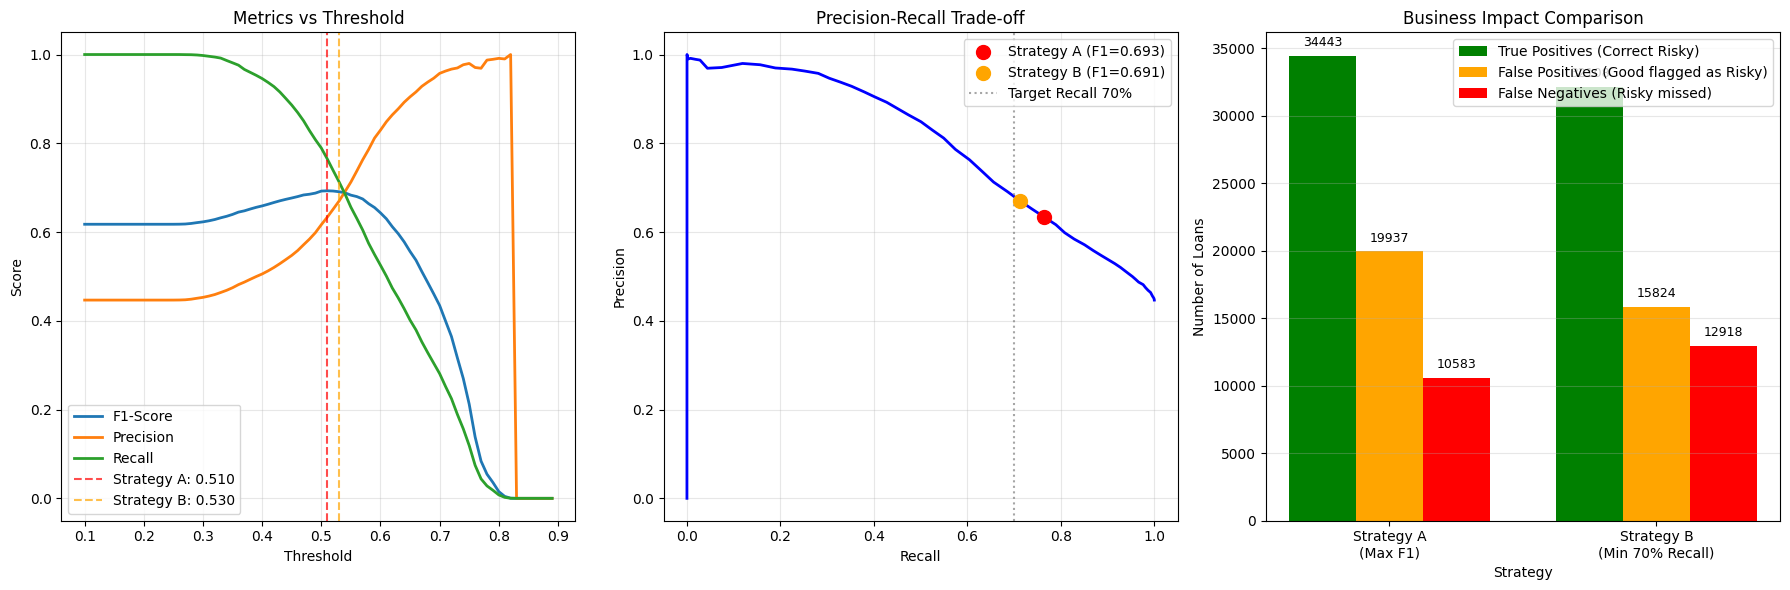

In [67]:
def plot_threshold_analysis(threshold_results, figsize=(18, 6)):
    """
    Plot comprehensive threshold analysis including F1, Precision, Recall curves
    """
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    thresholds = threshold_results['thresholds']
    f1_scores = threshold_results['f1_scores']
    precisions = threshold_results['precisions']
    recalls = threshold_results['recalls']
    
    # Plot 1: F1, Precision, Recall vs Threshold
    axes[0].plot(thresholds, f1_scores, label='F1-Score', linewidth=2)
    axes[0].plot(thresholds, precisions, label='Precision', linewidth=2)
    axes[0].plot(thresholds, recalls, label='Recall', linewidth=2)
    
    # Mark optimal points
    strategy_a = threshold_results['strategy_a']
    strategy_b = threshold_results['strategy_b']
    
    axes[0].axvline(x=strategy_a['threshold'], color='red', linestyle='--', alpha=0.7, 
                   label=f"Strategy A: {strategy_a['threshold']:.3f}")
    axes[0].axvline(x=strategy_b['threshold'], color='orange', linestyle='--', alpha=0.7,
                   label=f"Strategy B: {strategy_b['threshold']:.3f}")
    
    axes[0].set_xlabel('Threshold')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Metrics vs Threshold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Precision vs Recall Trade-off
    axes[1].plot(recalls, precisions, linewidth=2, color='blue')
    
    # Mark strategy points
    axes[1].scatter(strategy_a['recall'], strategy_a['precision'], 
                   color='red', s=100, label=f"Strategy A (F1={strategy_a['f1_score']:.3f})", zorder=5)
    axes[1].scatter(strategy_b['recall'], strategy_b['precision'], 
                   color='orange', s=100, label=f"Strategy B (F1={strategy_b['f1_score']:.3f})", zorder=5)
    
    # Add 70% recall line
    axes[1].axvline(x=0.7, color='gray', linestyle=':', alpha=0.7, label='Target Recall 70%')
    
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Trade-off')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Business Impact Simulation
    # Calculate different cost scenarios
    total_loans = len(y_val)
    actual_risky = (y_val == 1).sum()
    actual_good = (y_val == 0).sum()
    
    # Strategy A metrics
    threshold_a = strategy_a['threshold']
    pred_risky_a = (evaluation_results['y_val_pred_proba'] >= threshold_a).sum()
    true_positives_a = ((evaluation_results['y_val_pred_proba'] >= threshold_a) & (y_val == 1)).sum()
    false_positives_a = ((evaluation_results['y_val_pred_proba'] >= threshold_a) & (y_val == 0)).sum()
    false_negatives_a = ((evaluation_results['y_val_pred_proba'] < threshold_a) & (y_val == 1)).sum()
    
    # Strategy B metrics  
    threshold_b = strategy_b['threshold']
    pred_risky_b = (evaluation_results['y_val_pred_proba'] >= threshold_b).sum()
    true_positives_b = ((evaluation_results['y_val_pred_proba'] >= threshold_b) & (y_val == 1)).sum()
    false_positives_b = ((evaluation_results['y_val_pred_proba'] >= threshold_b) & (y_val == 0)).sum()
    false_negatives_b = ((evaluation_results['y_val_pred_proba'] < threshold_b) & (y_val == 1)).sum()
    
    strategies = ['Strategy A\n(Max F1)', 'Strategy B\n(Min 70% Recall)']
    true_pos = [true_positives_a, true_positives_b]
    false_pos = [false_positives_a, false_positives_b]
    false_neg = [false_negatives_a, false_negatives_b]
    
    x = np.arange(len(strategies))
    width = 0.25
    
    axes[2].bar(x - width, true_pos, width, label='True Positives (Correct Risky)', color='green')
    axes[2].bar(x, false_pos, width, label='False Positives (Good flagged as Risky)', color='orange')
    axes[2].bar(x + width, false_neg, width, label='False Negatives (Risky missed)', color='red')
    
    axes[2].set_xlabel('Strategy')
    axes[2].set_ylabel('Number of Loans')
    axes[2].set_title('Business Impact Comparison')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(strategies)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, strategy in enumerate(strategies):
        axes[2].text(i - width, true_pos[i] + 500, str(true_pos[i]), ha='center', va='bottom', fontsize=9)
        axes[2].text(i, false_pos[i] + 500, str(false_pos[i]), ha='center', va='bottom', fontsize=9)
        axes[2].text(i + width, false_neg[i] + 500, str(false_neg[i]), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Plot the threshold analysis
plot_threshold_analysis(threshold_results)

**What Happened:**
- The first plot shows a tug of war between recall and precision as threshold increased
    - The recall will decrease and less risky loans are identified, but the flagged risky loans will be more precise
    - The f1 score is just a balance between the two and strategy A seems to identify that
- The second plot is just showing that strategy A has higher recall but lower precision while strategy B has lower recall but higher precision 
- the third plot shows how the loan will be affected by the threshold, if we use strategy B
    - we will have more false negative (risky flagged as good) but the false positive reduced which save operation time and provide better customer experience

In [68]:
def evaluate_strategies_on_test_set(model, X_test, y_test, strategy_a_threshold, strategy_b_threshold):
    """
    Evaluate both strategies on the hidden test set
    """
    # Get predictions
    y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
    
    print("=== FINAL EVALUATION ON TEST SET ===")
    
    # Strategy A evaluation
    y_test_pred_a = (y_test_pred_proba >= strategy_a_threshold).astype(int)
    
    print(f"\n--- STRATEGY A: F1 MAXIMIZATION (Threshold: {strategy_a_threshold:.3f}) ---")
    print(classification_report(y_test, y_test_pred_a, target_names=['Good Loan', 'Risky Loan']))
    
    strategy_a_test = {
        'f1_score': f1_score(y_test, y_test_pred_a),
        'precision': precision_score(y_test, y_test_pred_a),
        'recall': recall_score(y_test, y_test_pred_a),
        'auc': roc_auc_score(y_test, y_test_pred_proba)
    }
    
    # Strategy B evaluation
    y_test_pred_b = (y_test_pred_proba >= strategy_b_threshold).astype(int)
    
    print(f"\n--- STRATEGY B: MINIMUM RECALL (Threshold: {strategy_b_threshold:.3f}) ---")
    print(classification_report(y_test, y_test_pred_b, target_names=['Good Loan', 'Risky Loan']))
    
    strategy_b_test = {
        'f1_score': f1_score(y_test, y_test_pred_b),
        'precision': precision_score(y_test, y_test_pred_b),
        'recall': recall_score(y_test, y_test_pred_b),
        'auc': roc_auc_score(y_test, y_test_pred_proba)
    }
    
    # Summary comparison
    print(f"\n=== STRATEGY COMPARISON ON TEST SET ===")
    print(f"{'Metric':<15} {'Strategy A':<12} {'Strategy B':<12} {'Winner':<10}")
    print("-" * 55)
    
    metrics = ['F1-Score', 'Precision', 'Recall', 'AUC-ROC']
    strategy_a_values = [strategy_a_test['f1_score'], strategy_a_test['precision'], 
                        strategy_a_test['recall'], strategy_a_test['auc']]
    strategy_b_values = [strategy_b_test['f1_score'], strategy_b_test['precision'], 
                        strategy_b_test['recall'], strategy_b_test['auc']]
    
    for metric, val_a, val_b in zip(metrics, strategy_a_values, strategy_b_values):
        winner = "Strategy A" if val_a > val_b else "Strategy B" if val_b > val_a else "Tie"
        print(f"{metric:<15} {val_a:<12.3f} {val_b:<12.3f} {winner:<10}")
    
    return strategy_a_test, strategy_b_test

# Evaluate both strategies on test set
test_results_a, test_results_b = evaluate_strategies_on_test_set(
    final_model, X_test, y_test,
    threshold_results['strategy_a']['threshold'],
    threshold_results['strategy_b']['threshold']
)

=== FINAL EVALUATION ON TEST SET ===

--- STRATEGY A: F1 MAXIMIZATION (Threshold: 0.510) ---
              precision    recall  f1-score   support

   Good Loan       0.80      0.47      0.59     63671
  Risky Loan       0.47      0.80      0.59     37089

    accuracy                           0.59    100760
   macro avg       0.63      0.63      0.59    100760
weighted avg       0.68      0.59      0.59    100760


--- STRATEGY B: MINIMUM RECALL (Threshold: 0.530) ---
              precision    recall  f1-score   support

   Good Loan       0.79      0.55      0.65     63671
  Risky Loan       0.49      0.75      0.60     37089

    accuracy                           0.62    100760
   macro avg       0.64      0.65      0.62    100760
weighted avg       0.68      0.62      0.63    100760


=== STRATEGY COMPARISON ON TEST SET ===
Metric          Strategy A   Strategy B   Winner    
-------------------------------------------------------
F1-Score        0.590        0.595        Strate

**What Happened:**
- We use the strategy to test on a hidden test set
- We can see that strategy B is better although with slightly less recall but higher precision
- Now let's do some simulation

In [69]:
def business_impact_analysis(strategy_a_test, strategy_b_test, 
                           avg_loan_amount=5000, default_loss_rate=0.8):
    """
    Calculate business impact of different threshold strategies
    """
    print(f"\n=== BUSINESS IMPACT ANALYSIS ===")
    print(f"Assumptions:")
    print(f"- Average loan amount: ${avg_loan_amount:,}")
    print(f"- Loss rate on defaulted loans: {default_loss_rate:.0%}")
    print(f"- Test set size: {len(y_test):,} loans")
    
    total_risky_loans = (y_test == 1).sum()
    total_good_loans = (y_test == 0).sum()
    
    print(f"- Actual risky loans: {total_risky_loans:,}")
    print(f"- Actual good loans: {total_good_loans:,}")
    
    # Calculate business metrics for each strategy
    strategies = {
        'Strategy A (F1 Max)': strategy_a_test,
        'Strategy B (70% Recall)': strategy_b_test
    }
    
    for name, results in strategies.items():
        print(f"\n--- {name} ---")
        
        # Calculate confusion matrix components
        tp = total_risky_loans * results['recall']  # True positives
        fn = total_risky_loans * (1 - results['recall'])  # False negatives
        fp = tp / results['precision'] - tp if results['precision'] > 0 else 0  # False positives
        tn = total_good_loans - fp  # True negatives
        
        # Business impact calculations
        prevented_losses = tp * avg_loan_amount * default_loss_rate
        actual_losses = fn * avg_loan_amount * default_loss_rate
        review_costs = (tp + fp) * 50  # Assume $50 cost per manual review
        lost_good_customers = fp  # Good customers rejected
        
        net_benefit = prevented_losses - actual_losses - review_costs
        
        print(f"  Risky loans caught: {tp:.0f} / {total_risky_loans} ({results['recall']:.1%})")
        print(f"  Good loans flagged incorrectly: {fp:.0f}")
        print(f"  Prevented losses: ${prevented_losses:,.0f}")
        print(f"  Actual losses: ${actual_losses:,.0f}")
        print(f"  Review costs: ${review_costs:,.0f}")
        print(f"  Net benefit: ${net_benefit:,.0f}")
        print(f"  ROI: {(net_benefit / (prevented_losses + review_costs)):.1%}")

# Run business impact analysis
business_impact_analysis(test_results_a, test_results_b)


=== BUSINESS IMPACT ANALYSIS ===
Assumptions:
- Average loan amount: $5,000
- Loss rate on defaulted loans: 80%
- Test set size: 100,760 loans
- Actual risky loans: 37,089
- Actual good loans: 63,671

--- Strategy A (F1 Max) ---
  Risky loans caught: 29694 / 37089 (80.1%)
  Good loans flagged incorrectly: 33895
  Prevented losses: $118,776,000
  Actual losses: $29,580,000
  Review costs: $3,179,450
  Net benefit: $86,016,550
  ROI: 70.5%

--- Strategy B (70% Recall) ---
  Risky loans caught: 27810 / 37089 (75.0%)
  Good loans flagged incorrectly: 28565
  Prevented losses: $111,240,000
  Actual losses: $37,116,000
  Review costs: $2,818,750
  Net benefit: $71,305,250
  ROI: 62.5%


**What Happened:**
- Note the result might be different if the loss rate and review cost is different.
- Using strategy in this scenario we earn extra 14.7 million thant strategy B
- When we choose strategy B we did not quantify financial impact where we can see it is very costly to miss a risky loan so we should get aim for higher recall

```
cost of false negative = 4000
ost of false positive = 50 (4000 / 50 = 80 times less)
```

- Although we spend more on review in strategy A, but the ROI is higher as well as the costliness of defaulting loan we should aim for higher recall

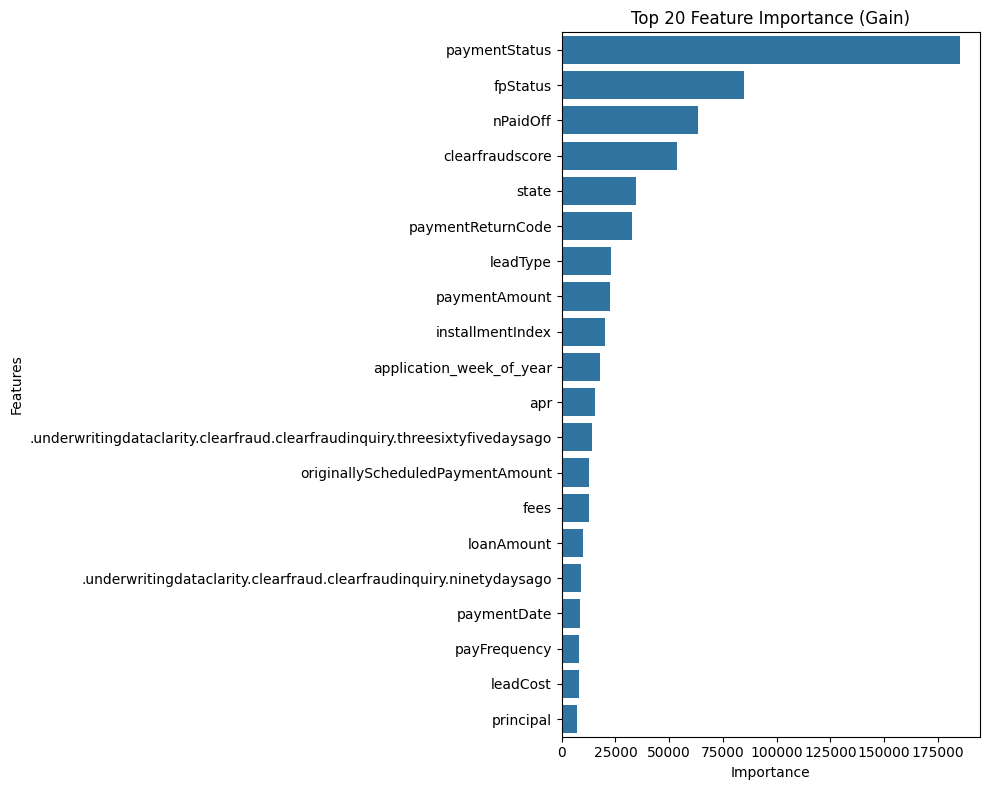

--- TOP 20 MOST IMPORTANT FEATURES ---
 1. paymentStatus: 185312.67
 2. fpStatus: 84986.68
 3. nPaidOff: 63351.32
 4. clearfraudscore: 53562.80
 5. state: 34437.83
 6. paymentReturnCode: 32949.86
 7. leadType: 23053.85
 8. paymentAmount: 22559.90
 9. installmentIndex: 19988.61
10. application_week_of_year: 17699.60
11. apr: 15524.97
12. .underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago: 13972.74
13. originallyScheduledPaymentAmount: 12833.24
14. fees: 12488.57
15. loanAmount: 10152.70
16. .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago: 9187.65
17. paymentDate: 8643.45
18. payFrequency: 8294.83
19. leadCost: 8202.26
20. principal: 7010.52


In [70]:
# Feature importance analysis
def plot_feature_importance(model, feature_names, top_n=20, figsize=(10, 8)):
    """
    Plot feature importance from LightGBM model
    """
    # Get feature importance
    importance = model.feature_importance(importance_type='gain')
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    # Plot top N features
    plt.figure(figsize=figsize)
    top_features = feature_imp.head(top_n)
    
    sns.barplot(data=top_features, y='feature', x='importance')
    plt.title(f'Top {top_n} Feature Importance (Gain)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    print(f"--- TOP {top_n} MOST IMPORTANT FEATURES ---")
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i:2d}. {row['feature']}: {row['importance']:.2f}")
    
    return feature_imp

# Plot feature importance
feature_importance = plot_feature_importance(final_model, X_train.columns.tolist())

**What Happened:**
- `paymentStatus` is the most important
    - It is the result of ACH attempt (automatic clearing house, electronic transfer from bank to credit unions)
    - Its outcome indicate the ability or willingness of the customer to pay
- `fpStatus`
    - This is the result of the first payment
    - An early success will shows a customer reliability and potential trajectory
- `nPaidOff`
    - How many loans this customer has paid off before
    - Good history will help with the customer creditworthiness
- `clearfraudscore`
    - Suspicious profile will have higher risks
- `state`
    - Location and demographics can influence risk as well
- `paymentReturnCode`
    - ACH error code why payment failed
    - We learn more about the reasons
- `leadType`
    - Different lead types will have different risk profiles
    - Return customer can be less risky then a new leads from `ping tree`

**What is a ping tree?**
- Sarah wants to loan so she applies online (lead generator) which creates a ping
- The tree which is the lender will get her information and the lender that is most willing to take the risk will accept her application


### Saving Artifacts

In [71]:
# Save the trained model
def save_model_and_artifacts(model, feature_names, categorical_columns, best_params, 
                           evaluation_results, save_dir='../models/'):
    """
    Save the trained model and related artifacts
    """
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the LightGBM model
    model_path = os.path.join(save_dir, 'lightgbm_loan_risk_model.txt')
    model.save_model(model_path)
    print(f"Model saved to: {model_path}")
    
    # Save model metadata
    metadata = {
        'model_type': 'LightGBM',
        'best_params': best_params,
        'feature_names': feature_names,
        'categorical_columns': categorical_columns,
        'evaluation_results': {
            'test_auc': evaluation_results['test_auc'],
            'test_ap': evaluation_results['test_ap'],
            'val_auc': evaluation_results['valid_auc'],
            'val_ap': evaluation_results['valid_ap']
        },
        'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'best_iteration': model.best_iteration
    }
    
    metadata_path = os.path.join(save_dir, 'model_metadata.joblib')
    joblib.dump(metadata, metadata_path)
    print(f"Model metadata saved to: {metadata_path}")
    
    # Save feature importance
    feature_imp_path = os.path.join(save_dir, 'feature_importance.csv')
    feature_importance.to_csv(feature_imp_path, index=False)
    print(f"Feature importance saved to: {feature_imp_path}")
    
    return model_path, metadata_path, feature_imp_path

# Save all model artifacts
model_paths = save_model_and_artifacts(
    final_model, 
    X_train.columns.tolist(), 
    categorical_columns, 
    best_params,
    evaluation_results
)

print(f"\n=== MODEL TRAINING COMPLETED ===")
print(f"Final Test AUC: {evaluation_results['test_auc']:.4f}")
print(f"Final Test Average Precision: {evaluation_results['test_ap']:.4f}")
print(f"Model files saved successfully!")

Model saved to: ../models/lightgbm_loan_risk_model.txt
Model metadata saved to: ../models/model_metadata.joblib
Feature importance saved to: ../models/feature_importance.csv

=== MODEL TRAINING COMPLETED ===
Final Test AUC: 0.7500
Final Test Average Precision: 0.7083
Model files saved successfully!
